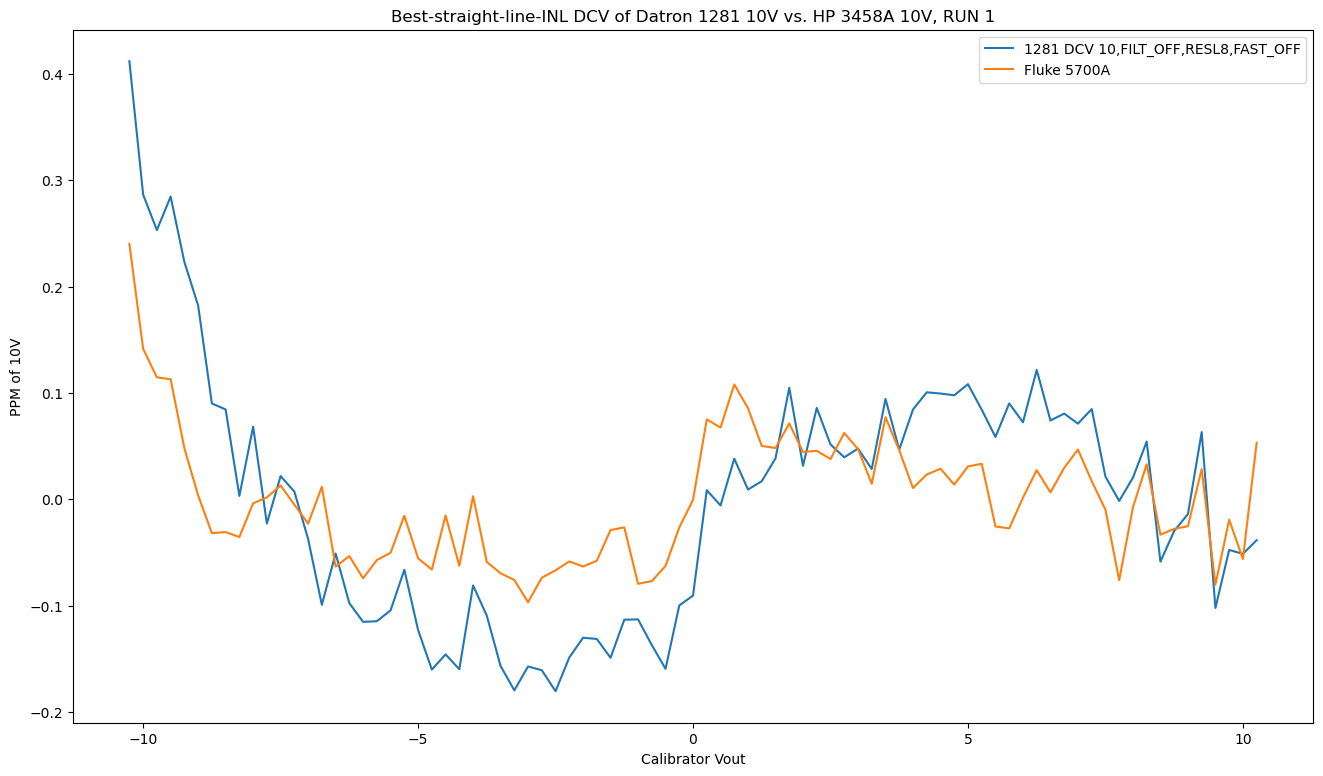

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Array from .csv

arra=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/datron_1281/refs/heads/main/csv/20241021-120623_REPS5700A_3458A_J1281_INL.csv',delimiter=',',skip_header=5)

# Columns to lists
F5700A = [col[0] for col in arra]
HP3458A = [col[1] for col in arra]
J1281 = [col[2] for col in arra]
PPMdeviation = [(HP3458A[x]-J1281[x])/(10/1000000) for x in range(len(HP3458A))]

figa, axa = plt.subplots()
#axa.plot(F5700A, PPMdeviationa, label='absolute')
axa.set_xlabel('Calibrator Vout')
axa.set_ylabel('PPM of 10V')
axa.set_title("Best-straight-line-INL DCV of Datron 1281 10V vs. HP 3458A 10V, RUN 1")
figa.set_size_inches(16, 9)
figa.patch.set_facecolor('white')

# Fit a polynomial function of degree 1
termsa = np.polyfit(HP3458A, PPMdeviation, 1)

# Create a function with the terms we just generated
polyfunctiona = np.poly1d(termsa)

bestfita = [PPMdeviation[x]-polyfunctiona(HP3458A[x]) for x in range(len(HP3458A))]

# Plot a little test
axa.plot(HP3458A, bestfita, label='1281 DCV 10,FILT_OFF,RESL8,FAST_OFF')

#####################
PPMdeviationa = [(HP3458A[x]-F5700A[x])/(10/1000000) for x in range(len(HP3458A))]
termsa = np.polyfit(HP3458A, PPMdeviationa, 1)
polyfunctiona = np.poly1d(termsa)
bestfita = [PPMdeviationa[x]-polyfunctiona(HP3458A[x]) for x in range(len(HP3458A))]
axa.plot(HP3458A, bestfita, label='Fluke 5700A')
#####################

axa.legend()